## Project Details
Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

## Business Goal
Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

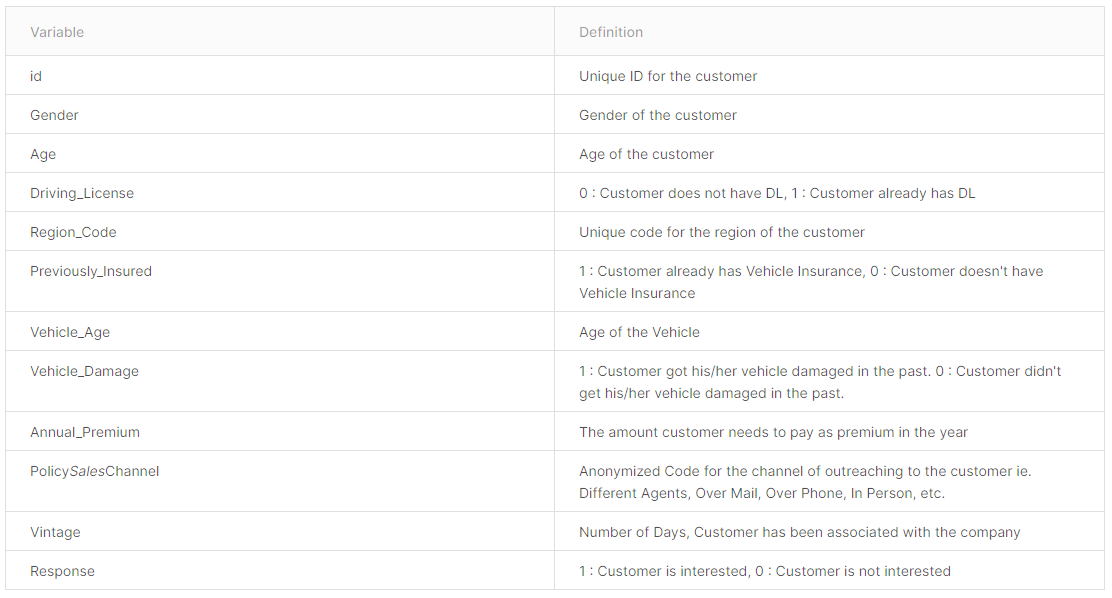

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import Dataset

In [72]:
train = pd.read_csv(r'C:\Users\Fabio\Desktop\Data Science\Kaggle Projects\Insurance Prediction\train.csv')
holdout = pd.read_csv(r'C:\Users\Fabio\Desktop\Data Science\Kaggle Projects\Insurance Prediction\test.csv')

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There is no missing data.

In [5]:
#looking at the info to get an idea on the numeric and the string columns.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## Exploratory Data Analysis

### Gender Analysis

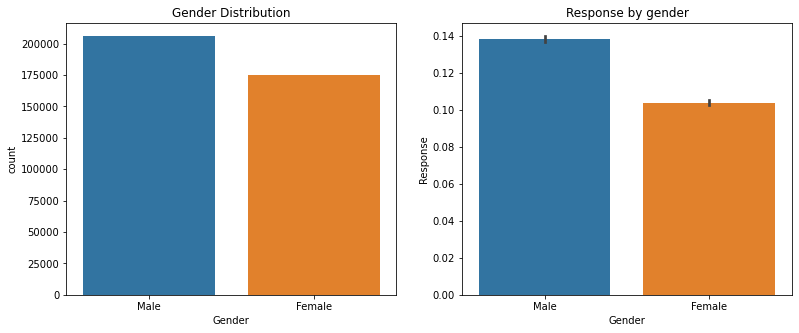

In [6]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Gender'])
plt.title("Gender Distribution")
plt.subplot(1,2,2)
sns.barplot(x="Gender", y="Response", data=train)
plt.title("Response by gender")
plt.show()

Gender Distribution is almost equal, a bit higher for male, as it is also the probability to get an interested response.   
The interested response represents a values close to 14% for male and to 10% for female.

### Age Distribution


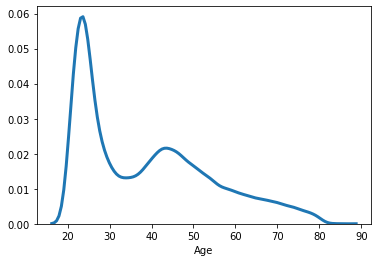

In [7]:
sns.distplot(train['Age'], hist = False, kde = True, kde_kws = {'linewidth': 3})
    

The most of our customers are in the range of age 20-30 years old. We should ask ourselves as a company why we dont have more customers in the range of 30-40 years old.

In [8]:
train['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

The youngest client is 20 years old and the oldest 85, it looks quite fair then we consider that there is not outliers in the data.

In [9]:
train['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

There is 812 people with no driving license, even when they could be interested we could think to get them off of the data, considering that we shouldnt ensure people without driving license.

### Vehicle_Age

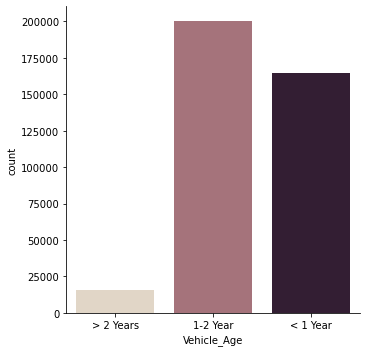

In [10]:
#Lets show the number of observations in each category.
sns.catplot(x="Vehicle_Age", kind="count", palette="ch:0.25", data=train)

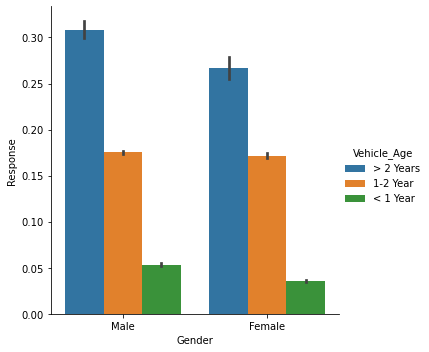

In [11]:
# lets obtain the estimate for the different categories of Vehicle_Age and Gender.
sns.catplot(x="Gender", y="Response", hue="Vehicle_Age", kind="bar", data=train)

We can see for example that the quantity of vehicles older than 2 years is the lowest but at the same time they are the more interested in a vehicle insurance.

### Vehicle Damaged

In [12]:
train['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

Text(0.5, 1.0, 'Response by Vehicle_Damage')

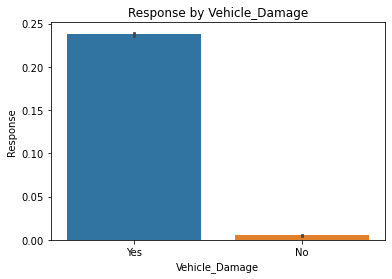

In [13]:
sns.barplot(x="Vehicle_Damage", y="Response", data=train)
plt.title("Response by Vehicle_Damage")

People that had their vehicle damaged previously are much more interested in a vehicle insurance.  

### Annual Premium

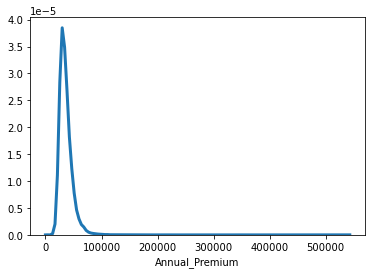

In [14]:
sns.distplot(train['Annual_Premium'], hist = False, kde = True, kde_kws = {'linewidth': 3})

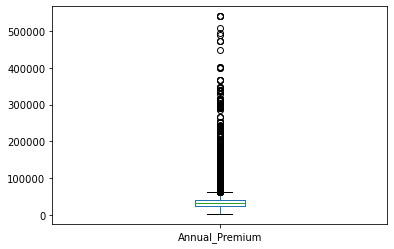

In [15]:
train['Annual_Premium'].plot(kind='box')

In [16]:
train['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

We have a really high variability in the premium price, we should recheck it, maybe comparing with another data base the kind of cars vehicle that is insured. 

### Vintage distribution

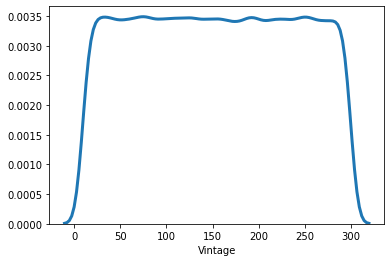

In [17]:
sns.distplot(train['Vintage'], hist = False, kde = True, kde_kws = {'linewidth': 3})

In [20]:
corr_train = train.corr()
sorted_corrs = abs(corr_train['Response']).sort_values(ascending=False)
sorted_corrs
#sns.heatmap(corr_train)

Response                1.000000
Previously_Insured      0.341170
Policy_Sales_Channel    0.139042
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
id                      0.001368
Vintage                 0.001050
Name: Response, dtype: float64

## Feature Engineering

In [21]:
numeric_cols = ['Age', 'Annual_Premium','Vintage']
cat_cols =['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']

In [22]:
train['Gender'] = train['Gender'].map({'Female':0, 'Male':1})
train['Vehicle_Age'] = train['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2})
train['Vehicle_Damage'] = train['Vehicle_Damage'].map({'No':0, 'Yes':1})

train[cat_cols] = train[cat_cols].astype('category')

train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [23]:
#Lets rescale numerical data.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])

In [38]:
features = train.columns.drop(['id','Response'])

all_X = train[features]
all_y = train['Response']

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size= 0.2)

## Modeling and Evaluation

### Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

hyperparameters = {
                        "n_estimators": [4, 6, 9],
                        "criterion": ["entropy", "gini"],
                        "max_depth": [2, 5, 10],
                        "max_features": ["log2", "sqrt"],
                        "min_samples_leaf": [1, 5, 8],
                        "min_samples_split": [2, 3, 5]
                        }

clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid=hyperparameters, cv=3)
grid.fit(train_X, train_y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 5, 10],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [4, 6, 9]})

In [45]:
grid.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=3, n_estimators=9)

In [44]:
print("Best Score: {}".format(grid.best_score_))
print("Best Parameters: {}\n".format(grid.best_params_))

Best Score: 0.8772955226034563
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 9}



In [53]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

test_pred = grid.predict(test_X)
test_AUC = roc_auc_score(test_y, test_pred)
test_AUC

0.50015430913441

In [54]:
print (classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66950
           1       0.75      0.00      0.00      9272

    accuracy                           0.88     76222
   macro avg       0.81      0.50      0.47     76222
weighted avg       0.86      0.88      0.82     76222



### AUC and ROC Curve

In [55]:
pred_prob = grid.predict_proba(test_X)
# roc curve for models
fpr, tpr, thresh = roc_curve(test_y, pred_prob[:,1], pos_label=1)

In [64]:
# auc scores
auc_score = roc_auc_score(test_y, pred_prob[:,1])
print(auc_score)

0.854265386451842


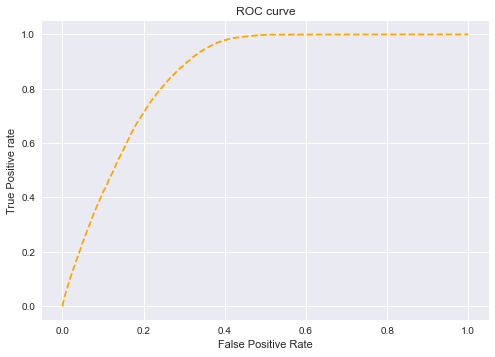

In [65]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Random forest classifier')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.show();

## Final Test Data Submission

In [73]:
holdout['Gender'] = holdout['Gender'].map({'Female':0, 'Male':1})
holdout['Vehicle_Age'] = holdout['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2})
holdout['Vehicle_Damage'] = holdout['Vehicle_Damage'].map({'No':0, 'Yes':1})

holdout[cat_cols] = holdout[cat_cols].astype('category')

holdout[numeric_cols] = scaler.fit_transform(holdout[numeric_cols])
holdout.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,0.076923,1,11.0,1,0,0,0.070633,152.0,0.148789
1,381111,1,0.307692,1,28.0,0,1,1,0.066321,7.0,0.349481
2,381112,1,0.415385,1,28.0,0,1,1,0.079717,124.0,0.653979
3,381113,1,0.061538,1,27.0,1,0,1,0.073978,152.0,0.612457
4,381114,1,0.107692,1,28.0,1,0,0,0.120293,152.0,0.993080


In [76]:
holdout_data = holdout[features]
predictions = grid.predict(holdout_data)
    
holdout_ids = holdout["id"]
submission_df = {"id": holdout_ids,
                 "Response": predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission.csv",index=False)



submission.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
